
# Spectrograms
The goal of this notebook is to explore how to plot spectrograms and tweak the parameters to observe interesting spectogramms that could be used as input data for self supervised learning.

In [1]:
import obspy
import obspy.imaging.spectrogram
from obspy.clients.fdsn import Client
from obspy import read, read_inventory, UTCDateTime, Stream

client = Client("IRIS")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
inventory = client.get_stations(station='DRV', channel='*', level='response')

In [4]:
inventory

Inventory created at 2023-12-17T17:02:41.510000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?station=DRV&channel=...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (2):
			G, SY
		Stations (2):
			G.DRV (Dumont d'Urville - Terre Adelie, Antarctica)
			SY.DRV (DRV synthetic)
		Channels (66):
			G.DRV..BHZ, G.DRV..BHN, G.DRV..BHE, G.DRV..LHZ (3x), 
			G.DRV..LHN (3x), G.DRV..LHE (3x), G.DRV..MHZ (2x), G.DRV..MHN (2x)
			G.DRV..MHE (2x), G.DRV..VHZ (3x), G.DRV..VHN (3x), 
			G.DRV..VHE (3x), G.DRV.00.BHZ (4x), G.DRV.00.BHN (4x), 
			G.DRV.00.BHE (4x), G.DRV.00.LHZ (4x), G.DRV.00.LHN (4x), 
			G.DRV.00.LHE (4x), G.DRV.00.VHZ (3x), G.DRV.00.VHN (3x), 
			G.DRV.00.VHE (3x), SY.DRV.S1.LXZ, SY.DRV.S1.LXN, SY.DRV.S1.LXE, 
			SY.DRV.S3.MXZ, SY.DRV.S3.MXN, SY.DRV.S3.MXE

In [292]:
global_starttime = UTCDateTime(2013,1,1,0,0,0)
global_endtime = UTCDateTime(2023,12,1,0,0,0)
duration = 60*60*1
elapsed = round(global_endtime - global_starttime)

In [294]:
# Fixed window
starttime = UTCDateTime(2023,6,15,0,0,0)
endtime = endtime = starttime + duration

In [7]:
# Get random window
starttime = global_starttime + random.randint(0, elapsed-duration)
endtime = starttime + duration

In [295]:
st = client.get_waveforms(network='G', station='DRV', location='*', channel='BH*', starttime=starttime, endtime=endtime)

In [296]:
st.write('data.mseed')

In [455]:
st = read('data.mseed')

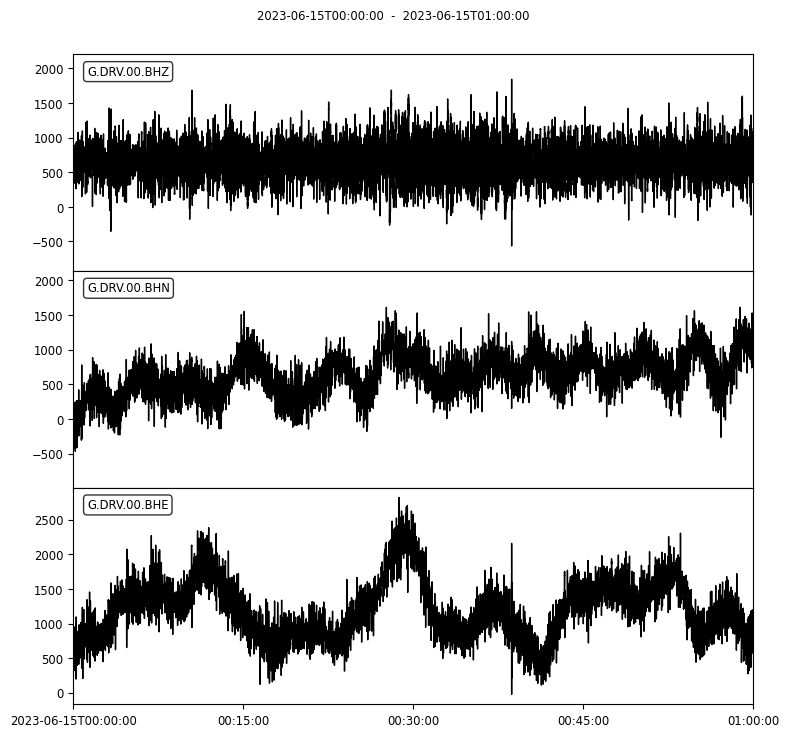

In [203]:
_ = st.plot()

In [456]:
st.detrend("demean")
#st.taper(type='hamming', max_percentage=0.05) # Taper when removing response
pre_filt = (0.005, 0.006, 30.0, 35.0)
st.remove_response(inventory=inventory, output='VEL', pre_filt=pre_filt, taper=True)

3 Trace(s) in Stream:
G.DRV.00.BHE | 2023-06-15T00:00:00.000000Z - 2023-06-15T01:00:00.000000Z | 20.0 Hz, 72001 samples
G.DRV.00.BHN | 2023-06-15T00:00:00.000000Z - 2023-06-15T01:00:00.000000Z | 20.0 Hz, 72001 samples
G.DRV.00.BHZ | 2023-06-15T00:00:00.000000Z - 2023-06-15T01:00:00.000000Z | 20.0 Hz, 72001 samples

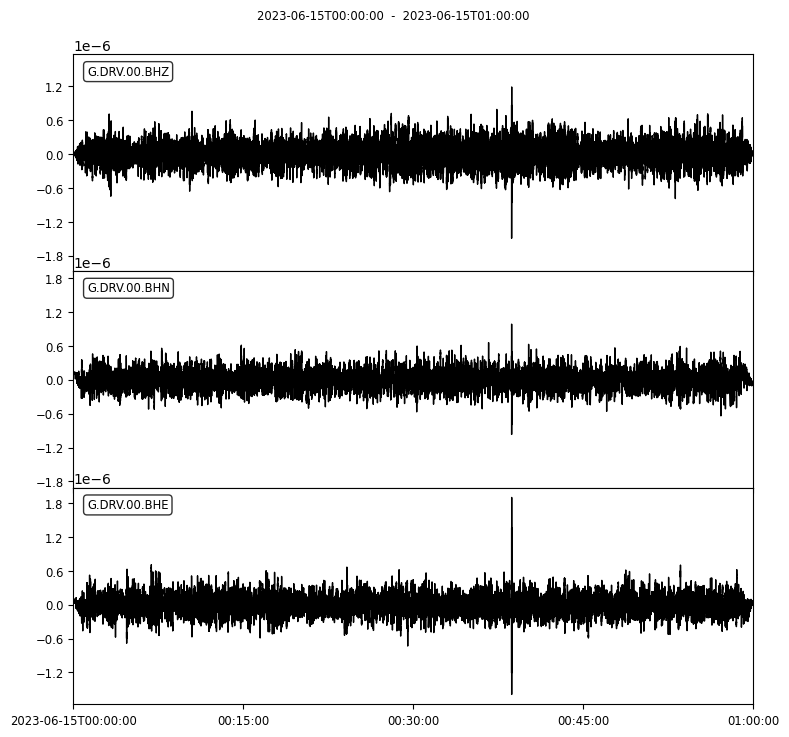

In [205]:
_ = st.plot()

In [12]:
T = st.select(component='Z')[0]

In [145]:
help(obspy.core.trace.Trace.remove_response)

Help on function remove_response in module obspy.core.trace:

remove_response(self, inventory=None, output='VEL', water_level=60, pre_filt=None, zero_mean=True, taper=True, taper_fraction=0.05, plot=False, fig=None, **kwargs)
    Deconvolve instrument response.
    
    Uses the adequate :class:`obspy.core.inventory.response.Response`
    from the provided
    :class:`obspy.core.inventory.inventory.Inventory` data. Raises an
    exception if the response is not present.
    
    Note that there are two ways to prevent overamplification
    while convolving the inverted instrument spectrum: One possibility is
    to specify a water level which represents a clipping of the inverse
    spectrum and limits amplification to a certain maximum cut-off value
    (`water_level` in dB). The other possibility is to taper the waveform
    data in the frequency domain prior to multiplying with the inverse
    spectrum, i.e. perform a pre-filtering in the frequency domain
    (specifying the four co

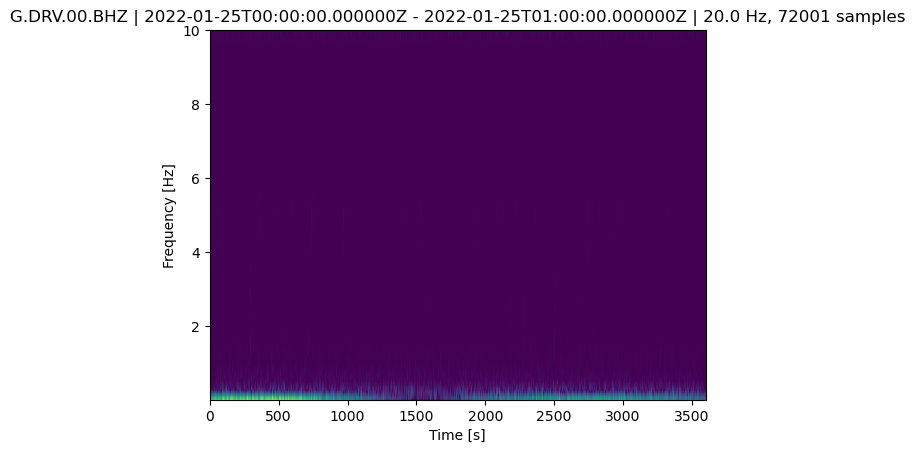

In [152]:
T.spectrogram()

In [13]:
help(obspy.imaging.spectrogram.spectrogram)

Help on function spectrogram in module obspy.imaging.spectrogram:

spectrogram(data, samp_rate, per_lap=0.9, wlen=None, log=False, outfile=None, fmt=None, axes=None, dbscale=False, mult=8.0, cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7f748d5db710>, zorder=None, title=None, show=True, clip=[0.0, 1.0])
    Computes and plots spectrogram of the input data.
    
    :param data: Input data
    :type samp_rate: float
    :param samp_rate: Samplerate in Hz
    :type per_lap: float
    :param per_lap: Percentage of overlap of sliding window, ranging from 0
        to 1. High overlaps take a long time to compute.
    :type wlen: int or float
    :param wlen: Window length for fft in seconds. If this parameter is too
        small, the calculation will take forever. If None, it defaults to a
        window length matching 128 samples.
    :type log: bool
    :param log: Logarithmic frequency axis if True, linear frequency axis
        otherwise.
    :type outfile: str
    :para

### Important parameters :
- `per lap` : overlap or not the windows for which the spectrum in amplitudes are calculated
- `wlen` : duration of the windows for which the the spectrum in amplitudes are calculated
- `dbscale` : colorscale based on decibels (log scale) instead of amplitude
- `clip` : define the color limits

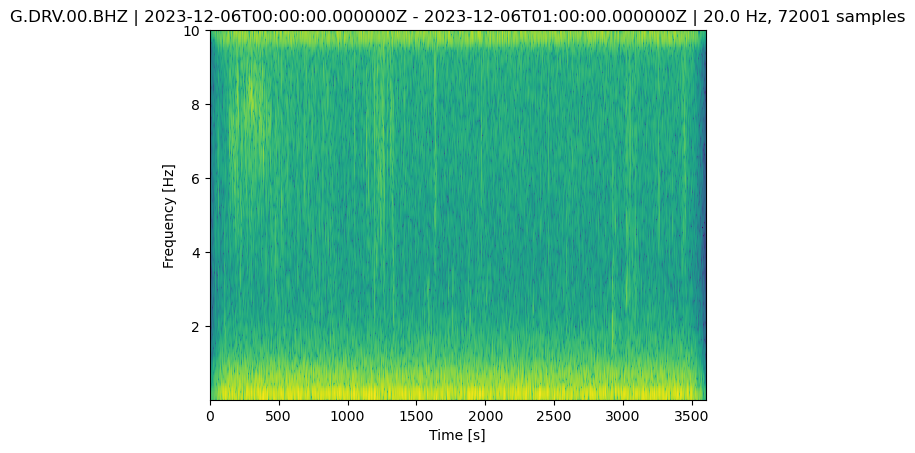

In [14]:
T.spectrogram(dbscale=True)

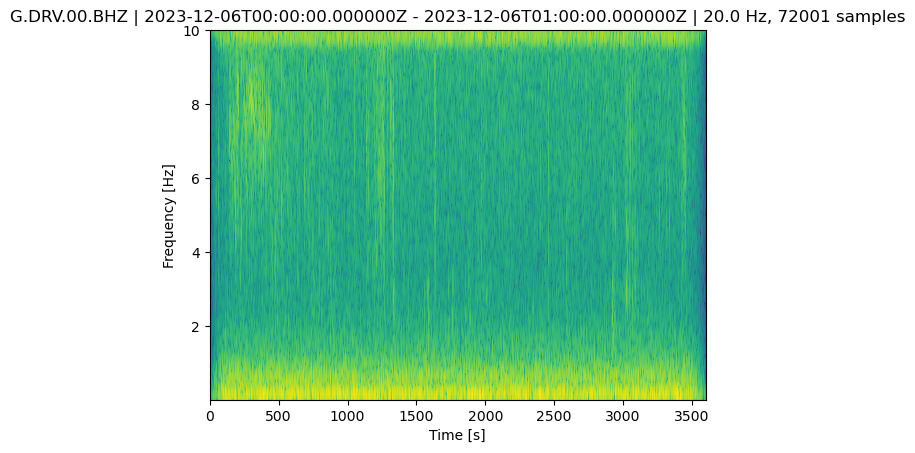

In [15]:
T.spectrogram(per_lap=.5, dbscale=True)

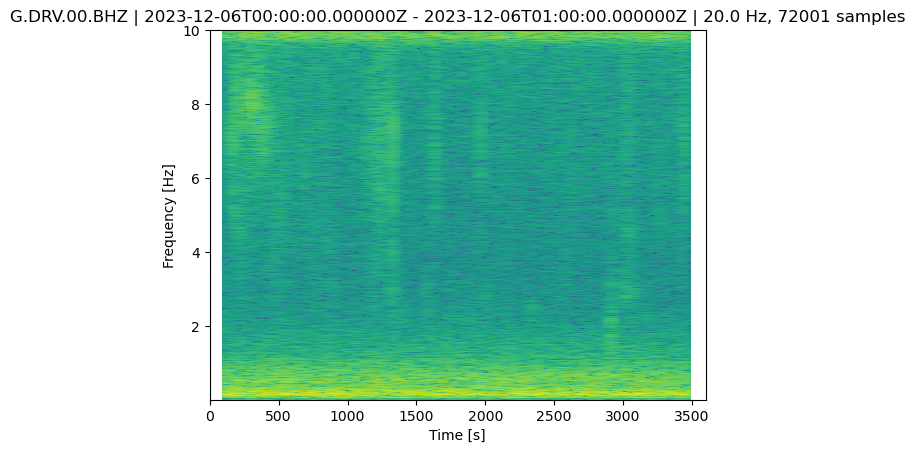

In [16]:
T.spectrogram(wlen=256, dbscale=True)

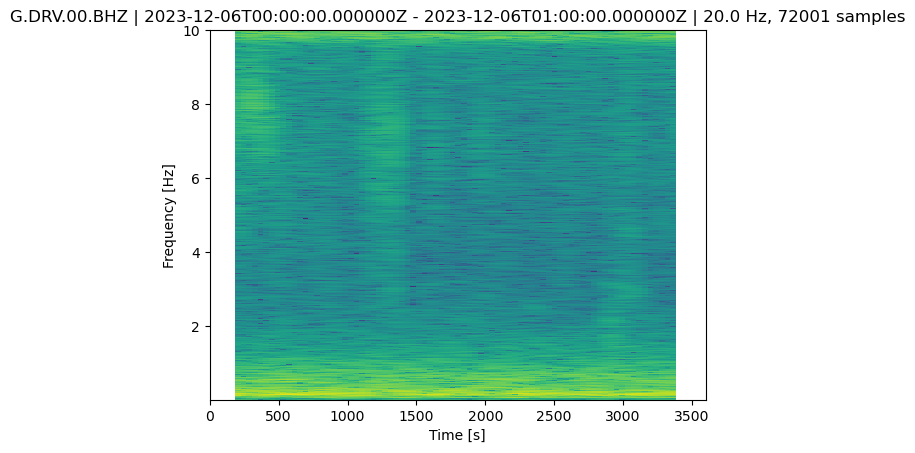

In [17]:
T.spectrogram(wlen=512, dbscale=True)

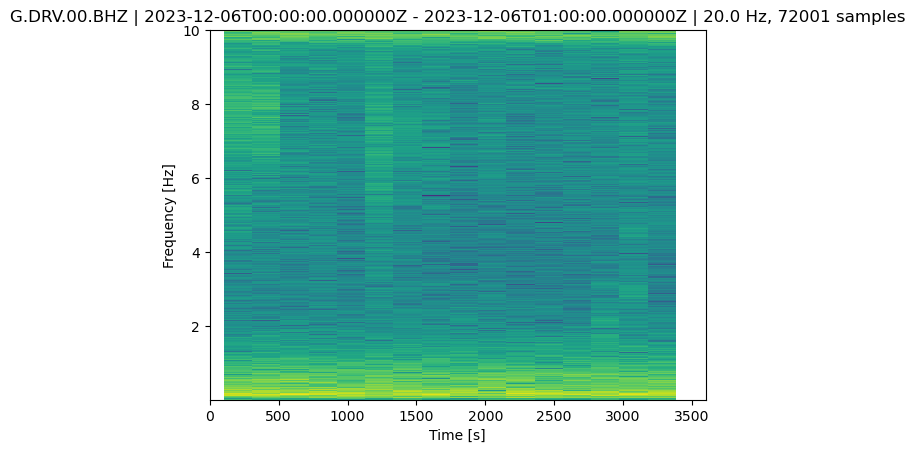

In [18]:
T.spectrogram(per_lap=.5, wlen=512, dbscale=True)

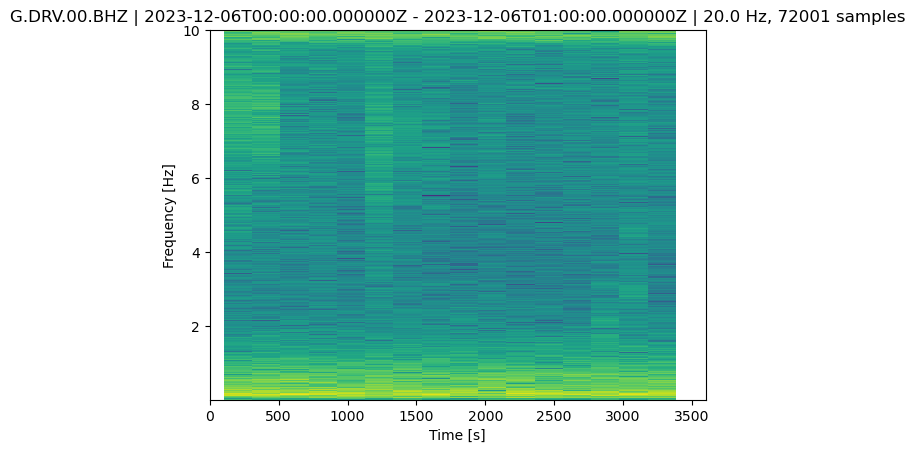

In [19]:
T.spectrogram(per_lap=.5, wlen=512, dbscale=True)

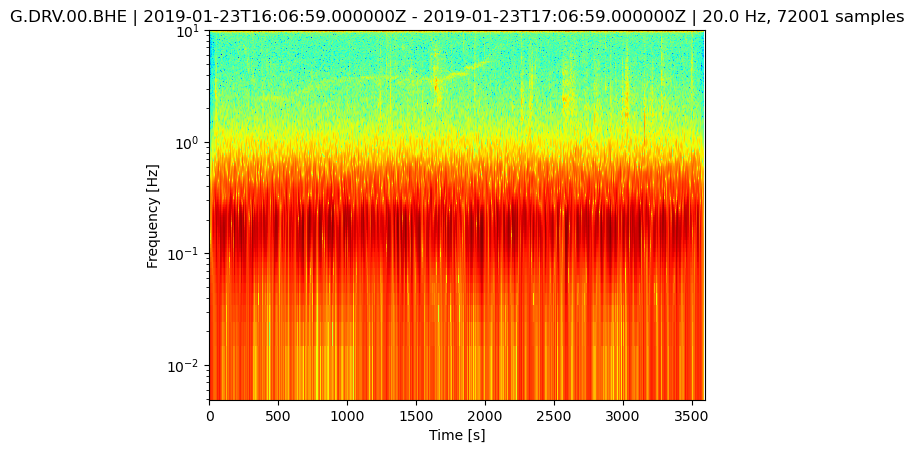

In [168]:
T.spectrogram(per_lap=.9, wlen=10, dbscale=True, log=True, cmap='jet')

## Spectrogramms with Scipy

In [442]:
import scipy.signal

In [443]:
help(scipy.signal.spectrogram)

Help on function spectrogram in module scipy.signal._spectral_py:

spectrogram(x, fs=1.0, window=('tukey', 0.25), nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, mode='psd')
    Compute a spectrogram with consecutive Fourier transforms.
    
    Spectrograms can be used as a way of visualizing the change of a
    nonstationary signal's frequency content over time.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series. Defaults to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. If `window` is a string or tuple, it is
        passed to `get_window` to generate the window values, which are
        DFT-even by default. See `get_window` for a list of windows and
        required parameters. If `window` is array_like it will be used
        directly as the window and its length 

In [457]:
T = st.select(component='Z')[0]
title = str(T)

In [458]:
wlen = 100
per_lap = .8

nperseg = round(wlen * T.stats.sampling_rate)
noverlap = round(nperseg * per_lap)
f, t, Sxx = scipy.signal.spectrogram(x=T.data, fs=T.stats.sampling_rate, nperseg=nperseg, noverlap=noverlap)

In [459]:
fmin, fmax = .01, 9
ii = np.where((f >= fmin) & (f <= fmax))

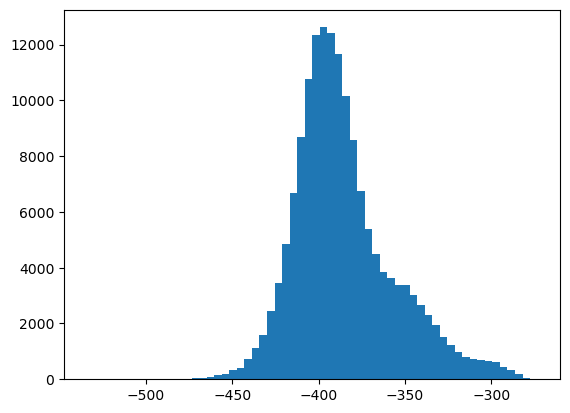

In [460]:
counts, bins, _ = plt.hist((np.log(Sxx[ii])*10).ravel(), bins=60)

In [461]:
vmin = -430
vmax = -300
jj = np.where((bins > vmin) & (bins < vmax))
keep = counts[jj].sum()/counts.sum()
print(f'{keep:.3f}')

0.960


Text(0.5, 1.0, 'G.DRV.00.BHZ | 2023-06-15T00:00:00.000000Z - 2023-06-15T01:00:00.000000Z | 20.0 Hz, 72001 samples')

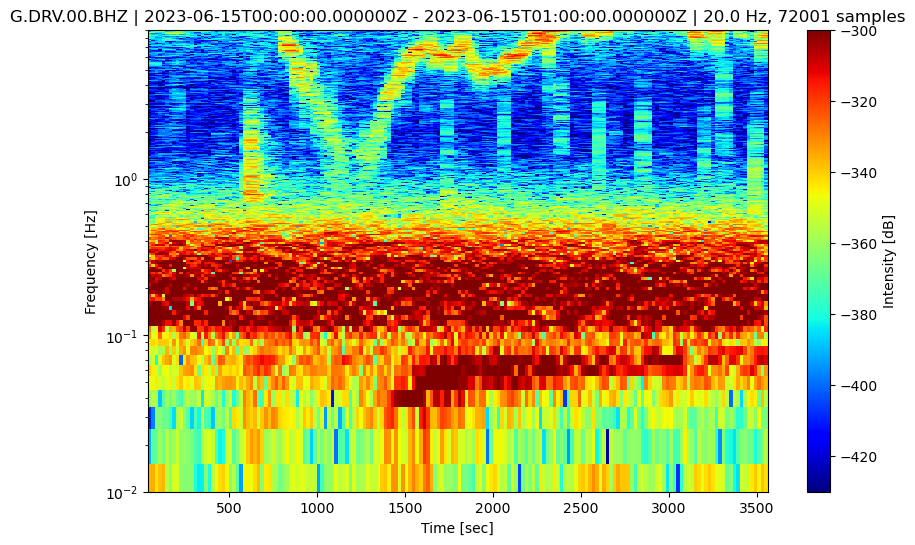

In [462]:
plt.figure(figsize=(10, 6), dpi=100)
plt.pcolormesh(t, f[ii], np.log(Sxx[ii])*10, shading='auto', cmap='jet', vmin=vmin, vmax=vmax) # gouraud
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('log')
plt.ylim(fmin, fmax)
plt.colorbar(label='Intensity [dB]')
plt.title(title)

In [463]:
wlen = 10
per_lap = .9

nperseg = round(wlen * T.stats.sampling_rate)
noverlap = round(nperseg*per_lap)
f, t, Sxx = scipy.signal.spectrogram(x=T.data, fs=T.stats.sampling_rate, nperseg=nperseg, noverlap=noverlap)

In [464]:
fmin, fmax = 2, 9
ii = np.where((f >= fmin) & (f <= fmax))

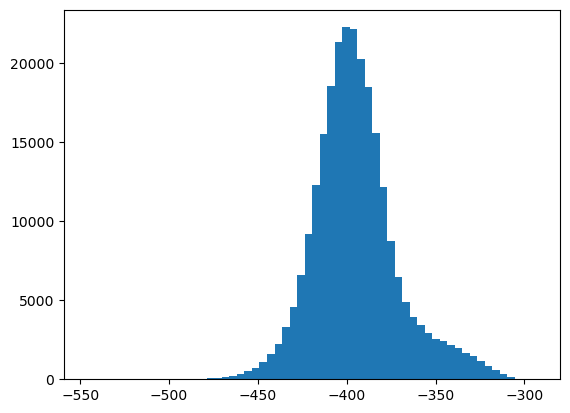

In [465]:
counts, bins, _ = plt.hist((np.log(Sxx[ii])*10).ravel(), bins=60)

In [466]:
vmin = -440
vmax = -340
jj = np.where((bins > vmin) & (bins < vmax))
keep = counts[jj].sum()/counts.sum()
print(f'{keep:.3f}')

0.940


Text(0.5, 1.0, 'G.DRV.00.BHZ | 2023-06-15T00:00:00.000000Z - 2023-06-15T01:00:00.000000Z | 20.0 Hz, 72001 samples')

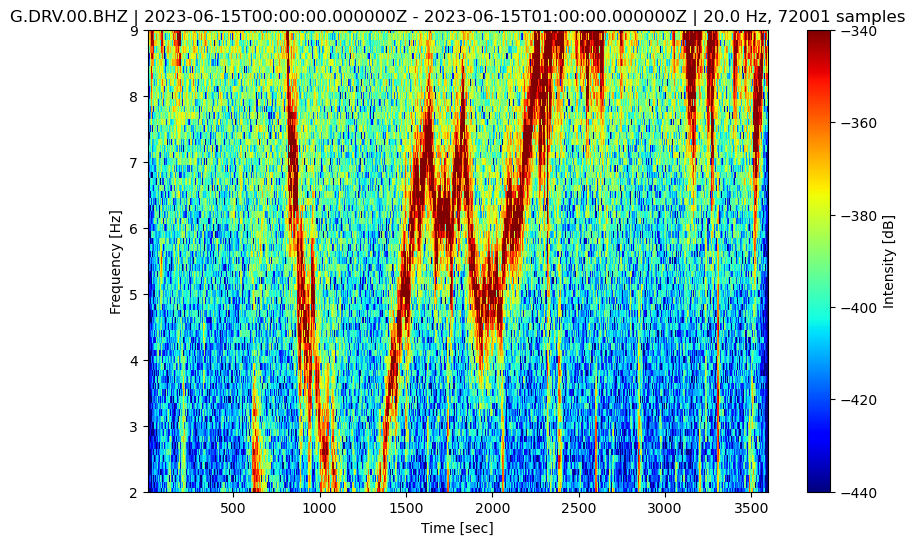

In [467]:
plt.figure(figsize=(10, 6), dpi=100)
plt.pcolormesh(t, f[ii], np.log(Sxx[ii])*10, shading='auto', cmap='jet', vmin=vmin, vmax=vmax)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.yscale('log')
plt.ylim(fmin, fmax)
plt.colorbar(label='Intensity [dB]')
plt.title(title)

In [468]:
wlen = 100
per_lap = .8

nperseg = round(wlen * T.stats.sampling_rate)
noverlap = round(nperseg*per_lap)
f, t, Sxx = scipy.signal.spectrogram(x=T.data, fs=T.stats.sampling_rate, nperseg=nperseg, noverlap=noverlap)

In [469]:
Tmin, Tmax = 10, 100 # Filtre basse fréquence : séismes ?
fmin, fmax = 1/Tmax, 1/Tmin
ii = np.where((f >= fmin) & (f <= fmax))

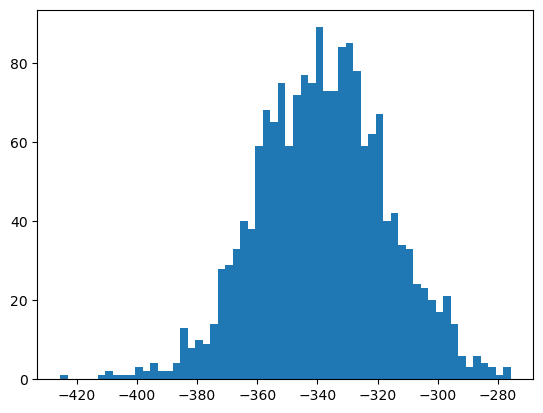

In [470]:
counts, bins, _ = plt.hist((np.log(Sxx[ii])*10).ravel(), bins=60)

In [471]:
vmin = -380
vmax = -290
jj = np.where((bins > vmin) & (bins < vmax))
keep = counts[jj].sum()/counts.sum()
print(f'{keep:.3f}')

0.959


Text(0.5, 1.0, 'G.DRV.00.BHZ | 2023-06-15T00:00:00.000000Z - 2023-06-15T01:00:00.000000Z | 20.0 Hz, 72001 samples')

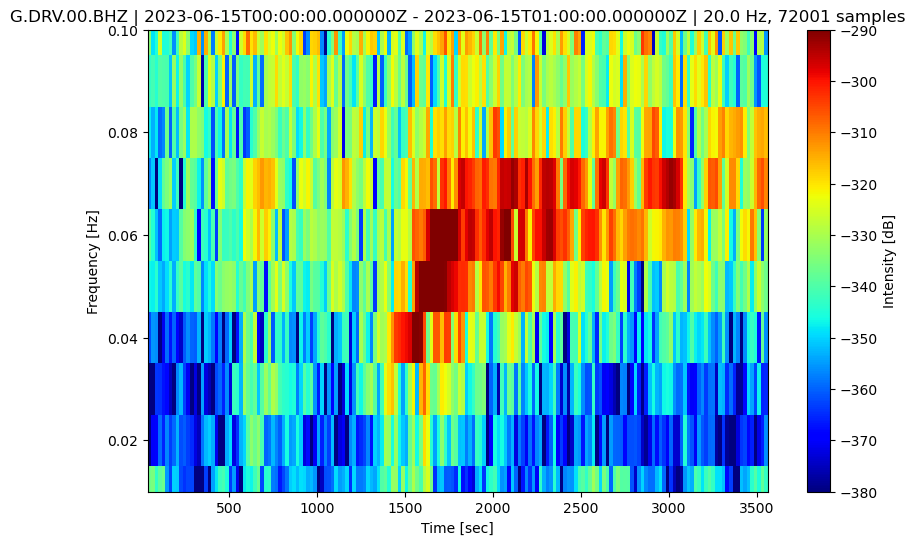

In [472]:
plt.figure(figsize=(10, 6), dpi=100)
plt.pcolormesh(t, f[ii], np.log(Sxx[ii])*10, shading='auto', cmap='jet', vmin=vmin, vmax=vmax)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.yscale('log')
plt.ylim(fmin, fmax)
plt.colorbar(label='Intensity [dB]')
plt.title(title)

In [473]:
wlen = 50
per_lap = .9

nperseg = round(wlen * T.stats.sampling_rate)
noverlap = round(nperseg*per_lap)
f, t, Sxx = scipy.signal.spectrogram(x=T.data, fs=T.stats.sampling_rate, nperseg=nperseg, noverlap=noverlap)

In [474]:
fmin, fmax = .05, 2
ii = np.where((f >= fmin) & (f <= fmax))

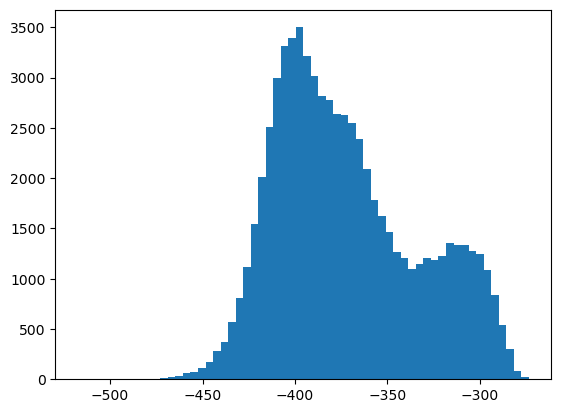

In [475]:
counts, bins, _ = plt.hist((np.log(Sxx[ii])*10).ravel(), bins=60)

In [476]:
vmin = -440
vmax = -300
jj = np.where((bins > vmin) & (bins < vmax))
keep = counts[jj].sum()/counts.sum()
print(f'{keep:.3f}')

0.942


Text(0.5, 1.0, 'G.DRV.00.BHZ | 2023-06-15T00:00:00.000000Z - 2023-06-15T01:00:00.000000Z | 20.0 Hz, 72001 samples')

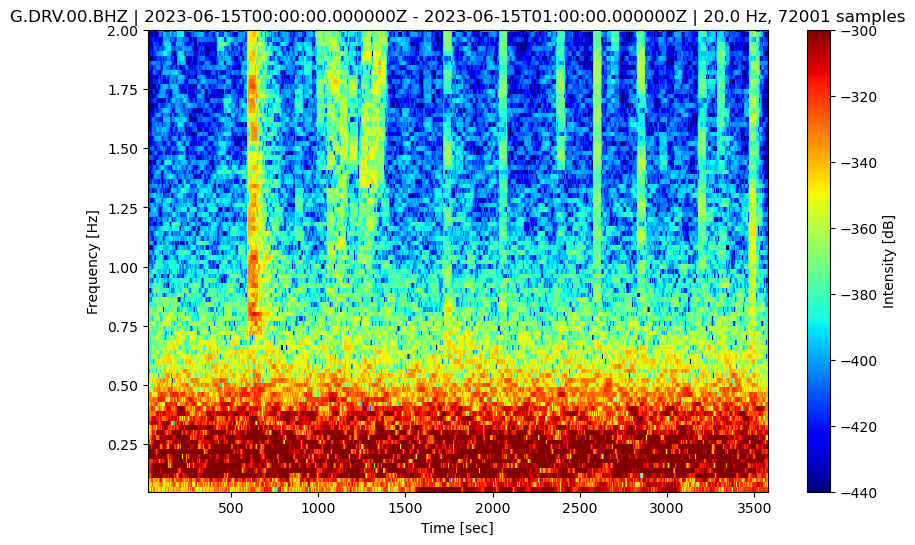

In [477]:
plt.figure(figsize=(10, 6), dpi=100)
plt.pcolormesh(t, f[ii], np.log(Sxx[ii])*10, shading='auto', cmap='jet', vmin=vmin, vmax=vmax)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.yscale('log')
plt.ylim(fmin, fmax)
plt.colorbar(label='Intensity [dB]')
plt.title(title)

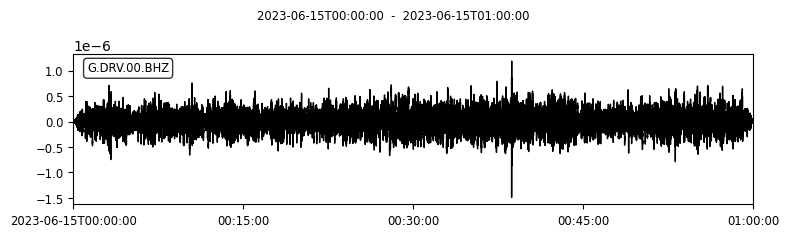

In [478]:
_ = T.plot()

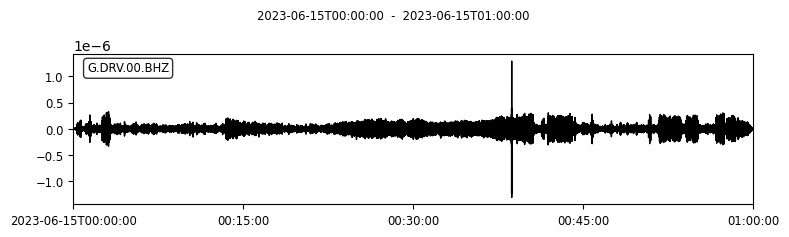

In [479]:
Tc = T.copy()
Tc.filter('highpass', freq=2)
_ = Tc.plot()

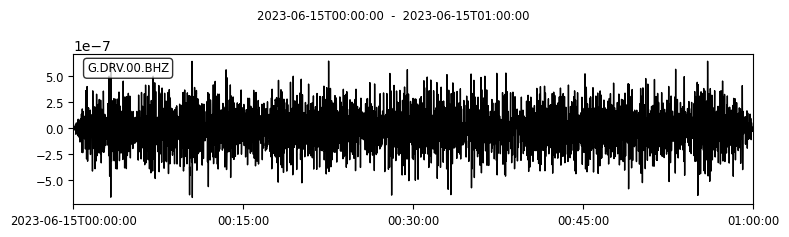

In [480]:
Tc = T.copy()
Tc.filter('bandpass', freqmin=.05, freqmax=2)
_ = Tc.plot()

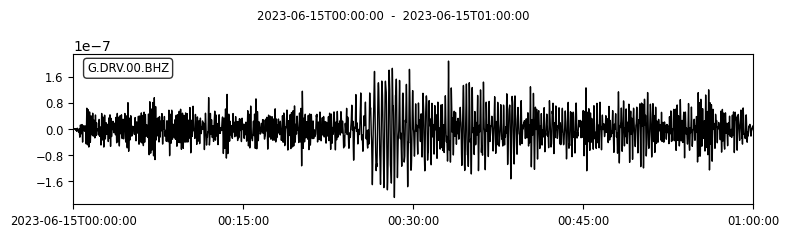

In [481]:
Tc = T.copy()
Tc.filter('lowpass', freq=.1)
_ = Tc.plot()